# 규제 선형 모델

- 다항식이 복잡해지면서 회귀 계수값이 크게 설정되고 과대 적합을 유발함
    → 훈련 데이터에서는 높은 성능을 보이지만, 테스트 데이터에서는 낮은 성능을 보임

- 선형 모델의 목적은 비용 함수를 최소화하는 것
- 이때, 규제 선형 모델은 비용 함수를 최소화 하는 데에 패널티(alpha)를 적용해 회귀계수의 크기를 제한함

In [ ]:
# regulation = 정규화
# L2 규제 = 릿지 회귀
# L1 규제 = 라쏘 회귀

# 릿지 회귀
# 라쏘 회귀
# 엘라스틱넷 회귀

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
### Ridge 회귀
- L2 규제를 적용한 회귀 모델
- 회귀 계수의 제곱을 최소화하는 방향으로 회귀 계수를 제한
- 회귀 계수의 크기를 제한하여 과대 적합을 방지
- 모델의 복잡도를 조절하여 일반화 성능을 향상

- 회귀 계수들의 제곱합에 alpha 패널티를 곱해 비용 산정에 반영 (cost function = MSE + alpha * sum(w^2))
- alpha 값이 커지면 회귀 계수가 작아짐 → 회귀 계수가 0에 가까워짐 → 모델이 단순해짐 → 과대적합 방지 → 일반화 성능 향상 → 과소적합 유발

- alpha가 클수록 회귀 계수의 크기를 더 많이 제한
- alpha가 작을수록 회귀 계수의 크기를 덜 제한

- 회귀 계수의 제곱합에 alpha 패널티를 곱해 비용 산정에 반영 (cost function = MSE + alpha * sum(w^2))
- alpha가 클수록 회귀 계수의 크기를 더 많이 제한
- alpha가 작을수록 회귀 계수의 크기를 덜 제한

In [2]:
from sklearn.model_selection import train_test_split

boston_df = pd.read_csv('./data/boston_housing_train.csv')

X = boston_df.drop('MEDV', axis=1)
y = boston_df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# 모델 생성
from sklearn.linear_model import Ridge

reg = Ridge(alpha=1)
reg.fit(X_train, y_train)

print(reg.score(X_train, y_train), reg.score(X_test, y_test))
# 0.7461161787884155 0.678974832784608
print(reg.coef_)
# [-0.12383039  0.03139178  0.01767668  2.54277179 -8.77249222  4.37980204
#  -0.01537349 -1.29086084  0.24406848 -0.01082435 -0.83346553  0.01348642
#  -0.53435396]

0.7461161787884155 0.678974832784608
[-0.12383039  0.03139178  0.01767668  2.54277179 -8.77249222  4.37980204
 -0.01537349 -1.29086084  0.24406848 -0.01082435 -0.83346553  0.01348642
 -0.53435396]


In [ ]:
# 모델 생성
from sklearn.linear_model import Ridge

reg = Ridge(alpha=1000)
reg.fit(X_train, y_train)

print(reg.score(X_train, y_train), reg.score(X_test, y_test))
# 0.6659274317723316 0.6378962987850003 -> alpha를 높이면서 일반화(과적합을 줄여서 X_train score를 줄여 y_test score와 비슷하게 맞춰짐짐)
print(reg.coef_) # -8.77249222 → -0.00715045 일반화 성능 향상
# [-0.11061359  0.03585601 -0.03547767  0.09054954 -0.00715045  0.51470729
#   0.02815722 -0.49486087  0.26292369 -0.01344429 -0.6079847   0.01144887
#  -0.79222816]

0.6659274317723316 0.6378962987850003
[-0.11061359  0.03585601 -0.03547767  0.09054954 -0.00715045  0.51470729
  0.02815722 -0.49486087  0.26292369 -0.01344429 -0.6079847   0.01144887
 -0.79222816]


- alpha 규제 강도를 조절해서 '가중치' '평가값'이 변하는 것을 하고 최적의 성능을 향상한다.

In [19]:
# 다른 평가 지표
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

# 평가 지표들들
def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}")
    

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False, degree=2)), ('ridge', Ridge(alpha=1))])
# Pipeline 이란 feature 엔지니어링 과정을 쉽게 해주는 도구
# 여러 단계의 데이터 변환 과정을 하나의 객체로 관리할 수 있게 해줌
# 예시) 데이터 전처리, 특성 추출, 모델 훈련 등 여러 단계의 작업을 하나의 객체로 관리

model = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False, degree=2)), # 1번째 인자로는 Pipeline 객체에 적용할 이름
    ('ridge', Ridge(alpha=10)) # 2번째 인자로는 적용할 모델
])

# PolynomialFeatures(include_bias=False, degree=2) # 2차 다항식 특성 생성, include_bias=False → 절편 없음

model.fit(X_train, y_train)
print(model.score(X_train, y_train), model.score(X_test, y_test))
evaluate_regression(y_test, model.predict(X_test))

# alpha 값을 조절해서 모델의 성능을 향상시키는 과정

0.934045449915728 0.7735821268700346
MSE: 15.8554, RMSE: 3.9819, MAE: 2.4906, R^2: 0.7736


In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False, degree=2)), ('ridge', Ridge(alpha=1))])
# Pipeline 이란 feature 엔지니어링 과정을 쉽게 해주는 도구
# 여러 단계의 데이터 변환 과정을 하나의 객체로 관리할 수 있게 해줌
# 예시) 데이터 전처리, 특성 추출, 모델 훈련 등 여러 단계의 작업을 하나의 객체로 관리

model = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False, degree=2)), # 1번째 인자로는 Pipeline 객체에 적용할 이름
    ('ridge', Ridge(alpha=10)) # 2번째 인자로는 적용할 모델
])

# PolynomialFeatures(include_bias=False, degree=2) # 2차 다항식 특성 생성, include_bias=False → 절편 없음

model.fit(X_train, y_train)
print(model.score(X_train, y_train), model.score(X_test, y_test))
evaluate_regression(y_test, model.predict(X_test))

0.934045449915728 0.7735821268700346
MSE: 15.8554, RMSE: 3.9819, MAE: 2.4906, R^2: 0.7736


In [24]:
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)


alpha=0.01
Train score: 0.9439, Test score: 0.7872
MSE: 14.8983, RMSE: 3.8598, MAE: 2.5366, R^2: 0.7872

alpha=0.1
Train score: 0.9419, Test score: 0.7878
MSE: 14.8575, RMSE: 3.8545, MAE: 2.5402, R^2: 0.7878

alpha=1
Train score: 0.9390, Test score: 0.7752
MSE: 15.7447, RMSE: 3.9680, MAE: 2.5288, R^2: 0.7752

alpha=10
Train score: 0.9340, Test score: 0.7736
MSE: 15.8554, RMSE: 3.9819, MAE: 2.4906, R^2: 0.7736

alpha=100
Train score: 0.9226, Test score: 0.7961
MSE: 14.2816, RMSE: 3.7791, MAE: 2.4590, R^2: 0.7961

alpha=1000
Train score: 0.9083, Test score: 0.8090
MSE: 13.3723, RMSE: 3.6568, MAE: 2.4854, R^2: 0.8090


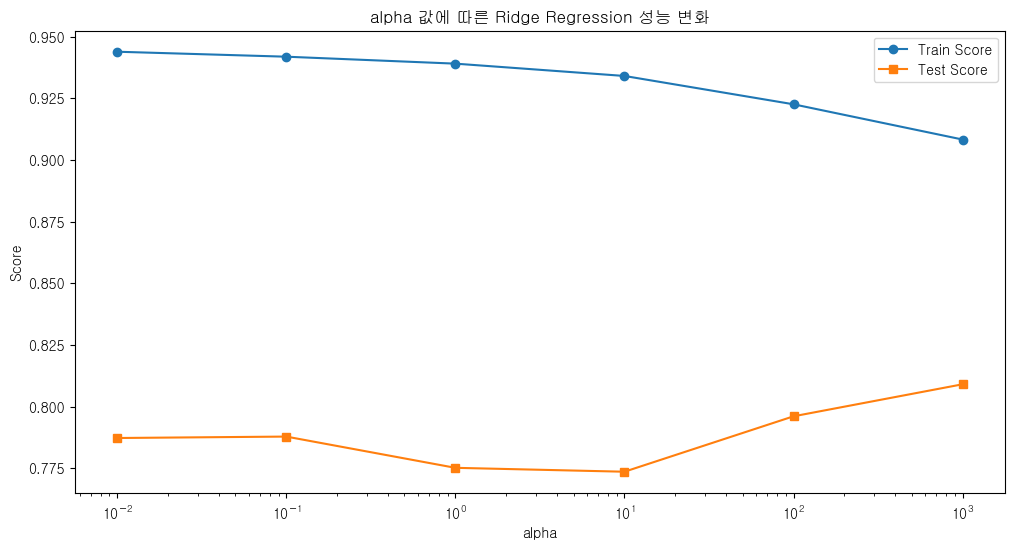

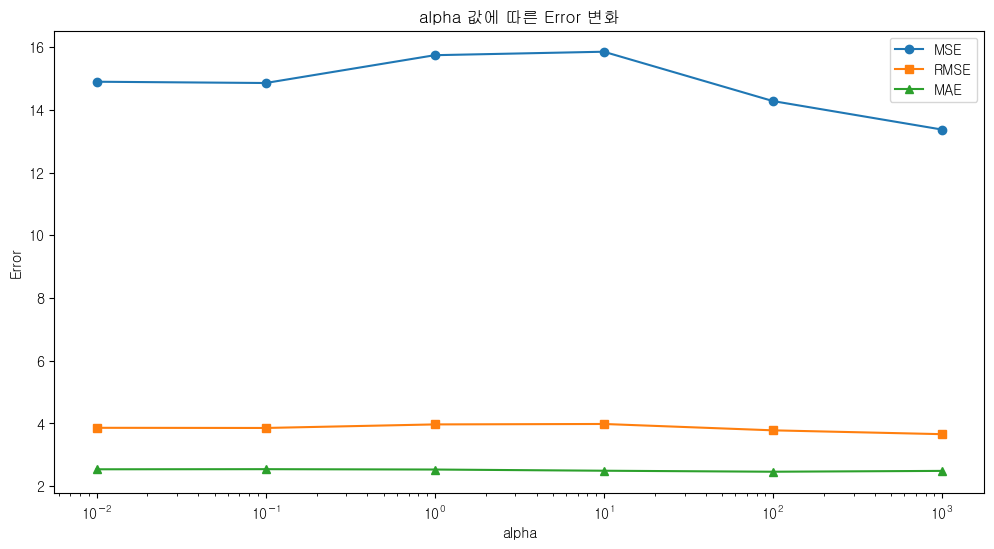

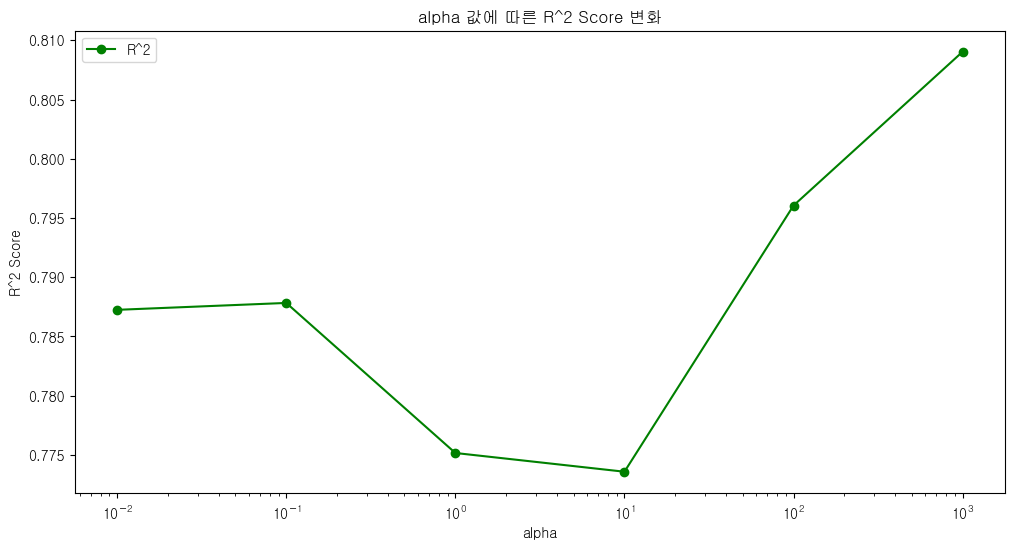

In [25]:
# alpha 값을 조절해서 모델의 성능을 향상시키는 과정

import numpy as np
import matplotlib.pyplot as plt

alphas = [0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
mse_list = []
rmse_list = []
mae_list = []
r2_list = []

for alpha in alphas:
    model = Pipeline([
        ('poly', PolynomialFeatures(include_bias=False, degree=2)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    print(f"\nalpha={alpha}")
    print(f"Train score: {train_score:.4f}, Test score: {test_score:.4f}")
    y_pred = model.predict(X_test)
    evaluate_regression(y_test, y_pred)
    
    # 평가 지표 저장
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(r2)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(alphas, train_scores, marker='o', label='Train Score')
plt.plot(alphas, test_scores, marker='s', label='Test Score')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Score')
plt.title('alpha 값에 따른 Ridge Regression 성능 변화')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(alphas, mse_list, marker='o', label='MSE')
plt.plot(alphas, rmse_list, marker='s', label='RMSE')
plt.plot(alphas, mae_list, marker='^', label='MAE')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Error')
plt.title('alpha 값에 따른 Error 변화')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(alphas, r2_list, marker='o', color='green', label='R^2')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2 Score')
plt.title('alpha 값에 따른 R^2 Score 변화')
plt.legend()
plt.show()

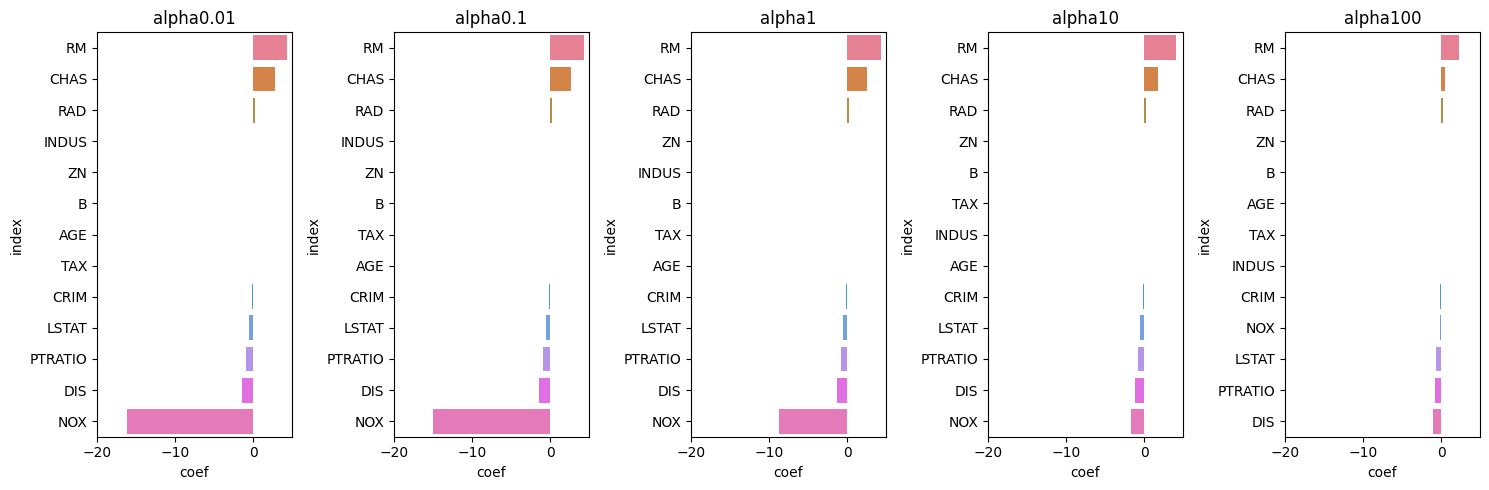

In [ ]:
# alpha 값에 따른 시각화
fig, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=5)

alphas = [0.01, 0.1, 1, 10, 100]

for i, alpha in enumerate(alphas):
    model = Ridge(alpha=alpha)
    
    model.fit(X_train, y_train)
    coef = model.coef_
    coef_ser = pd.Series(coef, index=X.columns)
    coef_ser.name = 'alpha' + str(alpha)
    coef_ser.sort_values(ascending=False, inplace=True)

    ax[i].set_title(coef_ser.name)
    ax[i].set_xlabel('coef')
    ax[i].set_ylabel('index')
    ax[i].set_xlim(-20, 5) # 축 범위 설정

    sns.barplot(x=coef_ser.values, y=coef_ser.index, ax=ax[i], hue=coef_ser.index)

plt.tight_layout()
plt.show()

### Lasso 회귀
- L1 규제를 적용한 선형 회귀 모델
- 회귀계수 절대값의 합을 alpha 값과 곱해 규제 정도 지정
- 회귀계수를 0까지 줄일 수 있음 = 해당 특성을 아예 반영하지 않도록 함 = 특성 선택 효과가 있음.

In [37]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=10)
reg.fit(X_train, y_train)

print(reg.score(X_train, y_train), reg.score(X_test, y_test))
print(reg.coef_)

0.5373948270602298 0.49459972513091244
[-0.          0.00806625 -0.          0.          0.          0.
  0.         -0.          0.         -0.00896833 -0.          0.01014021
 -0.62986968]


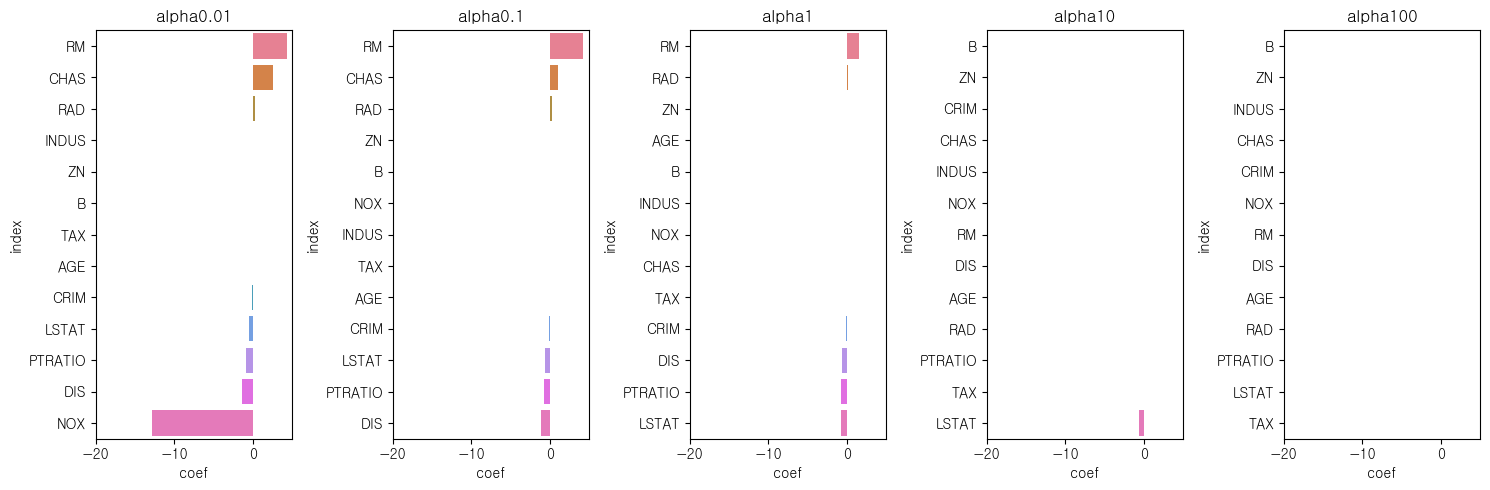

In [39]:
# alpha 값에 따른 시각화

fig, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=5)

alphas = [0.01, 0.1, 1, 10, 100]

for i, alpha in enumerate(alphas):
    model = Lasso(alpha=alpha)
    
    model.fit(X_train, y_train)
    coef = model.coef_
    coef_ser = pd.Series(coef, index=X.columns)
    coef_ser.name = 'alpha' + str(alpha)
    coef_ser.sort_values(ascending=False, inplace=True)

    ax[i].set_title(coef_ser.name)
    ax[i].set_xlabel('coef')
    ax[i].set_ylabel('index')
    ax[i].set_xlim(-20, 5) # 축 범위 설정

    sns.barplot(x=coef_ser.values, y=coef_ser.index, ax=ax[i], hue=coef_ser.index)

plt.tight_layout()
plt.show()


### ElasticNet 회귀

- L1, L2 규제를 함께 적용할 수 있는 회귀 모델

**하이퍼 파라미터**
- alpha : 규제 정도 (L1 + L2)
- l1_ratio : alpha 값 중 L1 규제 비율 (0~1), 기본값으로 0.5를 적용한다.

In [40]:
from sklearn.linear_model import ElasticNet

reg = ElasticNet(alpha=10, l1_ratio=0.2)
reg.fit(X_train, y_train)

print(reg.score(X_train, y_train), reg.score(X_test, y_test))
print(reg.coef_)

0.582267021479868 0.5515443461890219
[-0.04757351  0.0297799  -0.          0.          0.          0.01006149
  0.0263796  -0.01728823  0.0623326  -0.00926173 -0.19693406  0.01084713
 -0.69194846]


In [69]:
# Pipeline 사용 -> degree=3 특성 확장 -> ElasticNet 회귀 모델 적용
# 학습 -> 평가 -> evaluate_regression() 함수 적용

model = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False, degree=3)),
    ('reg', ElasticNet(alpha=800, l1_ratio=0.5))
])

model.fit(X_train, y_train)

print(model.score(X_train, y_train), model.score(X_test, y_test))
evaluate_regression(y_test, model.predict(X_test))


0.907931506503317 0.8116668483980197
MSE: 13.1884, RMSE: 3.6316, MAE: 2.3794, R^2: 0.8117


c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.881e+03, tolerance: 3.361e+00
  model = cd_fast.enet_coordinate_descent(


In [70]:
model.named_steps

{'poly': PolynomialFeatures(degree=3, include_bias=False),
 'reg': ElasticNet(alpha=800)}

In [ ]:
reg = model.named_steps['reg']



print(reg.coef_, reg.intercept_)

[ 0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [ ]:
# 졸려, 키 값으로 poly,  reg 키 값으로 모델 저장